Применение иерархической кластеризации и k-средних на плоских данных

In [99]:
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import datasets
from matplotlib import pyplot as plt
from time import time
import numpy as np

In [86]:
def kmeans(data, n):
    temp = time()
    k_means = KMeans(n_clusters=n).fit(data)
    clusterization = k_means.predict(data)
    print("Time:%s" % (time()-temp))
    for i in range(min(clusterization), max(clusterization) + 1):
        plt.scatter(x=data.T[0][clusterization == i], y=data.T[1][clusterization == i])

In [77]:
def hierarchical(data, t=13, depth=10):
    temp = time()
    Z = linkage(data, 'ward')
    clusters = fcluster(Z, t=t, depth=depth)
    print("Time:%s" % (time()-temp))
    K = max(clusters) - min(clusters) + 1
    print("Number of clusters:", K)
    for i in range(min(clusters), max(clusters) + 1):
            plt.scatter(x=data.T[0][clusters == i], y=data.T[1][clusters == i])
    plt.show()
    return K

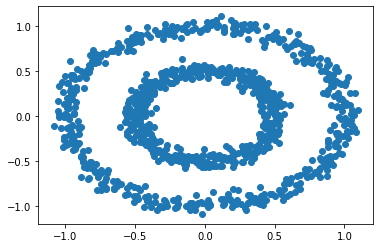

In [78]:
A1 = datasets.make_circles(n_samples=1000, factor=0.5, noise=0.05)
x1 = A1[0].T[0]
y1 = A1[0].T[1]
plt.scatter(x1, y1)
plt.show()

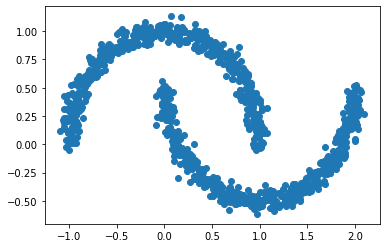

In [79]:
A2 = datasets.make_moons(n_samples=1000, noise=0.05)
x2 = A2[0].T[0]
y2 = A2[0].T[1]
plt.scatter(x2, y2)
plt.show()

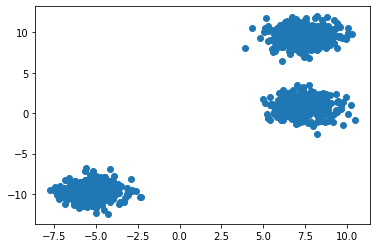

In [80]:
A3 = datasets.make_blobs(n_samples=1000, random_state=8)
x3 = A3[0].T[0]
y3 = A3[0].T[1]
plt.scatter(x3, y3)
plt.show()

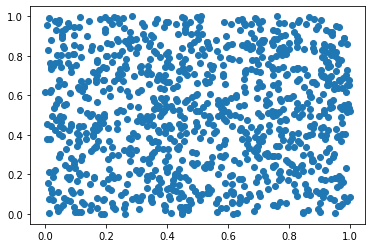

In [81]:
A4 = np.random.rand(1000, 2), None
x4 = A4[0].T[0]
y4 = A4[0].T[1]
plt.scatter(x4, y4)
plt.show()

Рассмотрим иерархическую кластеризацию на небольшой случайной выборке каждого из 4 датасетов. С известным далее количеством кластеров рассмотрим и k-средних.

Time:0.0010383129119873047
Number of clusters: 4


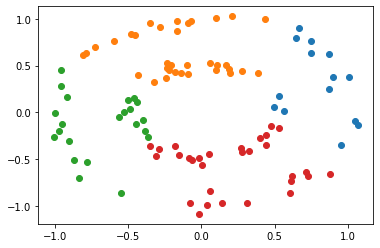

In [89]:
#A1:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.9)
H1 = hierarchical(np.array([x1_train, y1_train]).T, t=5)

Time:0.2498922348022461


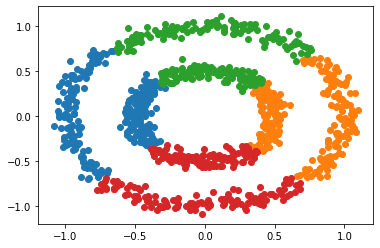

In [94]:
kmeans(A1[0], H1)

Time:0.0010006427764892578
Number of clusters: 4


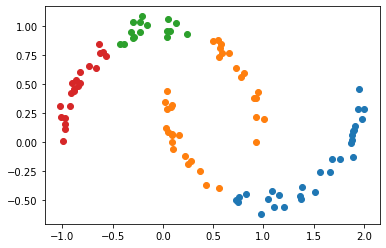

In [84]:
#A2:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.9)
H2 = hierarchical(np.array([x2_train, y2_train]).T, t=5)

Time:0.13498640060424805


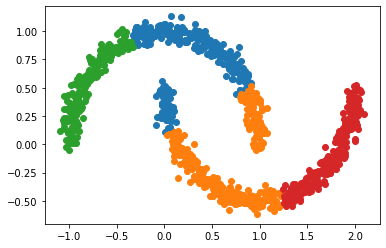

In [95]:
kmeans(A2[0], H2)

Time:0.001001596450805664
Number of clusters: 3


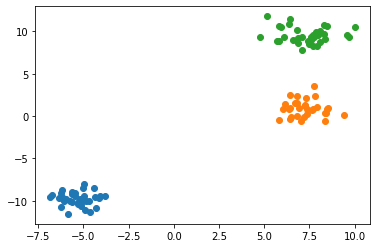

In [75]:
#A3:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.9)
H3 = hierarchical(np.array([x3_train, y3_train]).T, t=5)

Time:0.054963111877441406


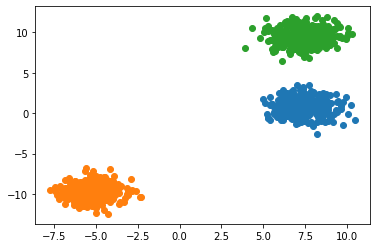

In [96]:
kmeans(A3[0], H3)

Time:0.002009153366088867
Number of clusters: 3


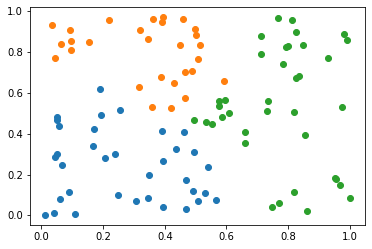

In [97]:
#A4:
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.9)
H4 = hierarchical(np.array([x4_train, y4_train]).T, t=5)

Time:0.11000180244445801


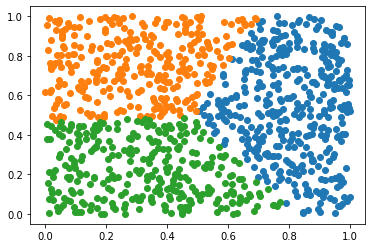

In [98]:
kmeans(A4[0], H4)

Вывод: применение методов кластеризации на небольшой случайной выборке позволяет достаточно точно определять количество кластеров от заданных параметров в генеральной совокупности, на чем мы и убедились, последовательно применяя иерархическую кластеризацию и кластеризацию k-средних на представленных данных.